In [1]:
import random
import time

import numpy as np
import torch

from Kof97Environment import Kof97Environment
from MAMEToolkit.sf_environment import Environment
import cv2
import os
from collections import deque

from matplotlib import pyplot as plt
from PIL import Image, ImageOps

In [2]:
roms_path = "roms/"  # Replace this with the path to your ROMs
env = Kof97Environment("env1", roms_path)

#env.start()
i = 0
#actions = [(6,8),(6,8),(6,8),(6,8),(6,8),(0,8),(0,8),(0,8),(8,0),(8,0),(8,8),(8,8),(8,8),(8,8),(8,8),(8,8),(8,8),(8,8),(8,8),(8,8),(8,8),(8,8),(8,8),(8,8)]
actions = [(6,8),(6,8),(7,8),(7,8),(0,8),(0,0),(0,0),(8,0),(8,0),(8,8),(8,8),(8,8),(8,8),(8,8),(8,8)]
env.start()

deque([tensor([[[-1.0000, -1.0000, -0.9843,  ..., -0.9843, -1.0000, -1.0000],
                [-1.0000, -1.0000, -0.9843,  ..., -0.9843, -1.0000, -1.0000],
                [-1.0000, -1.0000, -0.9843,  ..., -0.9843, -1.0000, -1.0000],
                ...,
                [-1.0000, -1.0000, -0.9608,  ..., -0.9686, -1.0000, -1.0000],
                [-1.0000, -1.0000, -0.9529,  ..., -0.9765, -1.0000, -1.0000],
                [-1.0000, -1.0000, -0.9529,  ..., -0.9686, -1.0000, -1.0000]]]),
       tensor([[[-1.0000, -1.0000, -0.9843,  ..., -0.9843, -1.0000, -1.0000],
                [-1.0000, -1.0000, -0.9843,  ..., -0.9843, -1.0000, -1.0000],
                [-1.0000, -1.0000, -0.9843,  ..., -0.9843, -1.0000, -1.0000],
                ...,
                [-1.0000, -1.0000, -0.9608,  ..., -0.9686, -1.0000, -1.0000],
                [-1.0000, -1.0000, -0.9529,  ..., -0.9765, -1.0000, -1.0000],
                [-1.0000, -1.0000, -0.9529,  ..., -0.9686, -1.0000, -1.0000]]]),
       tensor([[

Figure(432x288)


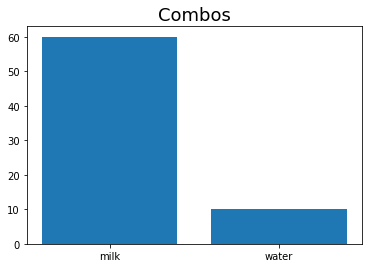

In [6]:
import matplotlib.pyplot as plt
import numpy as np

figure = plt.figure()
data = {'milk': 60, 'water': 10}
names = list(data.keys())
values = list(data.values())

#plt.bar(range(len(data)), values, tick_label=names)
figure.add_subplot().bar(names,values,tick_label=names,)
plt.title('Combos', fontsize=18)
print(figure)

In [9]:

res = env.emu.console.writeln('manager:machine():save("/home/duhuaiyu/kof97save02")')
print(res)

None


In [4]:
env.loadRest('"/home/duhuaiyu/kof97save"')

In [7]:
d = deque(maxlen=20)

In [8]:
i = 0
while i< 30:
    # move_action = random.randint(0, 8)
    # attack_action = random.randint(0, 7)
    # time.sleep(1)
    index = i % len(actions)
    move_action = actions[index][0]
    attack_action = actions[index][1]
    #print (move_action,attack_action)
    frame, reward, round_done, stage_done, game_done = env.step(move_action, attack_action)
    d.append(frame)
    #if not round_done:
        #for frame in frames:
        #print('save file')
        #cv2.imwrite(os.path.join(temp_dir, str(i) +".png"),cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
    #print("game_done",game_done)
    if game_done:
        env.reset()
    elif stage_done:
        env.reset()
    elif round_done:
        #print("round done!!")
        env.reset()
    i = i +1

In [6]:
print(d[0])

deque([tensor([[[-1.0000, -1.0000, -0.9216,  ..., -0.9529, -1.0000, -1.0000],
         [-1.0000, -1.0000, -0.9216,  ..., -0.9529, -1.0000, -1.0000],
         [-1.0000, -1.0000, -0.9216,  ..., -0.9529, -1.0000, -1.0000],
         ...,
         [-1.0000, -1.0000, -0.9451,  ..., -0.9451, -1.0000, -1.0000],
         [-1.0000, -1.0000, -0.9294,  ..., -0.9216, -1.0000, -1.0000],
         [-1.0000, -1.0000, -0.9294,  ..., -0.9294, -1.0000, -1.0000]]]), tensor([[[-1.0000, -1.0000, -0.9216,  ..., -0.9529, -1.0000, -1.0000],
         [-1.0000, -1.0000, -0.9216,  ..., -0.9529, -1.0000, -1.0000],
         [-1.0000, -1.0000, -0.9216,  ..., -0.9529, -1.0000, -1.0000],
         ...,
         [-1.0000, -1.0000, -0.9451,  ..., -0.9451, -1.0000, -1.0000],
         [-1.0000, -1.0000, -0.9294,  ..., -0.9216, -1.0000, -1.0000],
         [-1.0000, -1.0000, -0.9294,  ..., -0.9294, -1.0000, -1.0000]]]), tensor([[[-1.0000, -1.0000, -0.9216,  ..., -0.9529, -1.0000, -1.0000],
         [-1.0000, -1.0000, -0.9216,

In [14]:
res = torch.stack(tuple(d[0]), dim=1).size()
res
#tuple(d[0])


torch.Size([1, 5, 128, 128])